# `CREDIT CARD FRAUD DETECTION`

## `1.0 Project Overview`

Credit Card Fraud Detection is a critical project aimed at leveraging machine learning to identify and prevent fraudulent credit card transactions. In an era where digital transactions are prevalent, safeguarding financial transactions is paramount. This project focuses on building a robust model that enhances security measures and ensures the integrity of financial transactions.

### `1.1 Problem Statement`

The rise in credit card fraud poses a significant threat to both financial institutions and consumers. Detecting fraudulent transactions manually is impractical due to the sheer volume of transactions. The challenge is to develop a machine learning model capable of accurately distinguishing between genuine and fraudulent credit card transactions in real-time, thereby minimizing financial losses and maintaining trust in the financial system.

### `1.2 Project Objectives`


`Build a Robust Model:` To develop a machine learning model capable of accurately identifying fraudulent credit card transactions while minimizing false positives.

`Preprocessing and Normalization:` Implement effective preprocessing techniques to clean and normalize transaction data, ensuring the model's efficiency and accuracy.

`Handle Class Imbalance:` Address class imbalance issues inherent in fraud detection by employing strategies such as oversampling or undersampling to avoid bias towards the majority class.

### `1.3 Evaluation Metrics`

We will Utilize classification algorithms like logistic regression or random forests for training.
We shall also evaluate the model's performance using the following metrics:

`Precision:` Measure the accuracy of the model in correctly identifying fraudulent transactions among the predicted positives, minimizing false positives.

`Recall:` Evaluate the model's ability to identify all actual fraudulent transactions, minimizing false negatives.

`F1-Score`: A balanced metric considering both precision and recall, providing a comprehensive measure of the model's performance.

`AUPRC (Area Under the Precision-Recall Curve):` Specifically employed due to significant class imbalance, offering a nuanced evaluation of the model's predictive capabilities.

### `1.4 Defining the Experimental Design`

- Import Libraries and Load Dataset.

- Data Preprocessing

- Scaling and Normalization.

- Exploratory Data Analysis (EDA).

- Modelling & Evaluation

- Challenging the model

- Conclusion

- Recommendations

## `2.0 Data Understanding`

**Context:** Credit card fraud detection is essential to prevent unauthorized charges.

**Dataset Snapshot:**

Transactions: September 2013, European cardholders.

492 frauds in 284,807 transactions (0.172%).

Highly unbalanced data with features derived from PCA transformation ('V1' to 'V28'), and non-transformed features 'Time' and 'Amount.'

**Data Limitations and Implications for the Project:**
While the dataset provides a valuable foundation for fraud detection, certain limitations and implications need consideration:

`Confidentiality Constraints:` The original features and detailed background information are undisclosed due to confidentiality issues, limiting the depth of feature understanding.

`Generalization Challenges:` The dataset, representing a specific timeframe and region, may pose challenges in generalizing the model's effectiveness to broader contexts.

`Dynamic Nature of Fraud:` Fraud patterns evolve, and a model trained on historical data may face challenges in adapting to emerging fraud tactics.
`Potential Bias:` The collaboration's dataset might have inherent biases, necessitating careful consideration during model development.

Acknowledging these limitations is crucial for framing realistic expectations and tailoring the model's design to address potential challenges effectively. The project's success hinges on not only leveraging the dataset's strengths but also navigating its limitations to build a robust and adaptable fraud detection system.

## `3.0 Data Preparation`

### 3.1 Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Explore label class
print('Normal transactions count: ', credit['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', credit['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


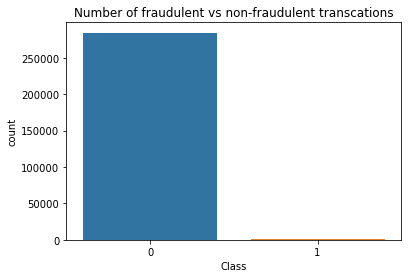

In [5]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=credit)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

**Checking and handling missing values and duplicates**


In [6]:
# Check for null values 
print(f'The data has {credit.isna().sum().sum()} missing values')

The data has 0 missing values


In [7]:
# checking for duplicates
print(f'The data has {credit.duplicated().sum()} duplicates')

The data has 1081 duplicates


In [8]:
# Define the subset of columns to check for duplicates
subset_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                  'V27', 'V28', 'Amount']
# Drop duplicates, keeping the original occurrence
credit = credit.drop_duplicates(subset=subset_columns, keep='first')
# checking for duplicates
print(f'The data has {credit.duplicated().sum()} duplicates')

The data has 0 duplicates


## `4.0 Exploratory Data Analysis(EDA)`

This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns

In [9]:
# general statistical summary
credit.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,...,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00
mean,94811.08,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,88.47,0.00
std,47481.05,1.95,1.65,1.51,1.41,1.38,1.33,1.23,1.18,1.10,...,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.40,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54204.75,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.50,0.02,0.06,0.18,-0.02,-0.05,-0.28,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139298.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.51,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### `4.1 Univariate Analysis`

**Distribution of Transaction Amounts**

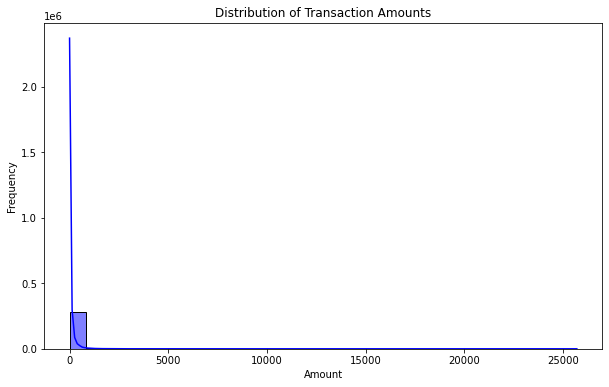

In [10]:
# Plotting the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit['Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


**Analysis:**

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

**Time Elapsed Since First Transaction**

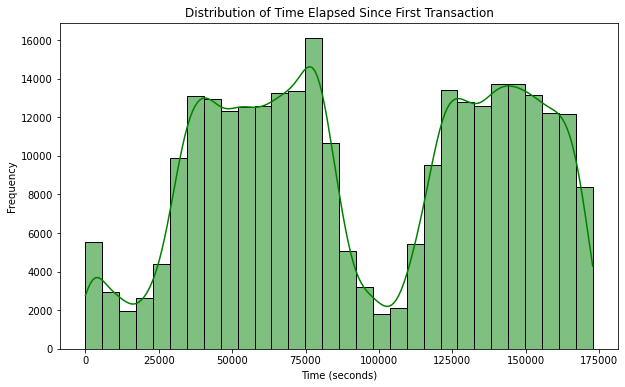

In [11]:
# Plotting the distribution of time elapsed since the first transaction
plt.figure(figsize=(10, 6))
sns.histplot(credit['Time'], bins=30, kde=True, color='green')
plt.title('Distribution of Time Elapsed Since First Transaction')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


**Analysis:**

The distribution of time elapsed since the first transaction reveals a pattern where certain time intervals experience higher transaction frequencies. 

### `4.2 Bivariate Analysis`

**Fraud vs. Amount**

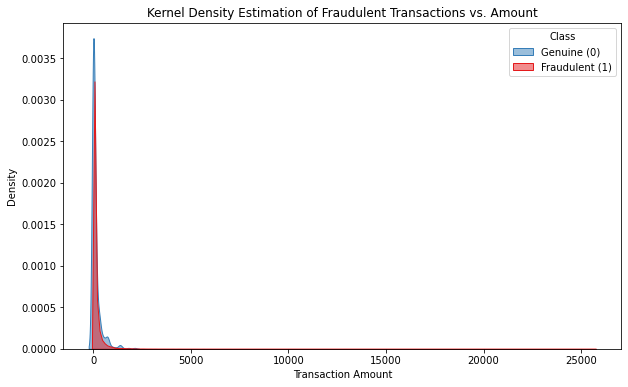

In [12]:
# KDE plots to compare Fraud vs. Amount
plt.figure(figsize=(10, 6))
sns.kdeplot(data=credit, x='Amount', hue='Class', common_norm=False, fill=True, palette='Set1', alpha=0.5)
plt.title('Kernel Density Estimation of Fraudulent Transactions vs. Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Genuine (0)', 'Fraudulent (1)'])
plt.show()


**Analysis:**

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

**Observe the distribution of classes with time**

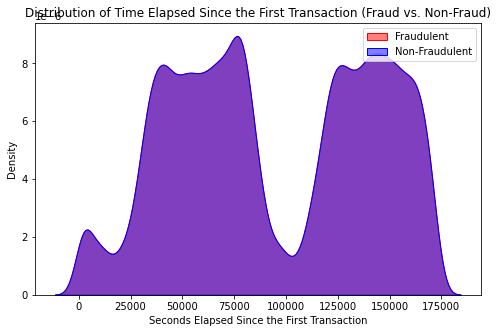

In [13]:
# Distribution plot
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(credit['Time'], label='Fraudulent', fill=True, color='red', alpha=0.5)
ax = sns.kdeplot(credit['Time'], label='Non-Fraudulent', fill=True, color='blue', alpha=0.5)
ax.set(xlabel='Seconds Elapsed Since the First Transaction')
plt.title('Distribution of Time Elapsed Since the First Transaction (Fraud vs. Non-Fraud)')
plt.legend()
plt.show()


**Analysis**

Time may not be a decisive factor in isolation, and additional features or more advanced techniques may be required for effective fraud detection. 

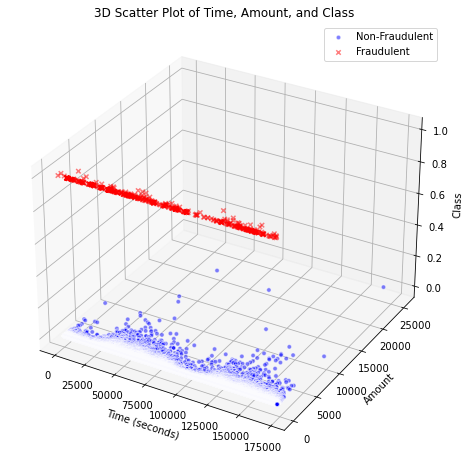

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-fraudulent transactions
ax.scatter(credit[credit['Class'] == 0]['Time'],
           credit[credit['Class'] == 0]['Amount'],
           zs=0, label='Non-Fraudulent', c='blue', alpha=0.5, edgecolors='w', marker='o')

# Scatter plot for fraudulent transactions
ax.scatter(credit[credit['Class'] == 1]['Time'],
           credit[credit['Class'] == 1]['Amount'],
           zs=1, label='Fraudulent', c='red', alpha=0.5, edgecolors='w', marker='x')

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amount')
ax.set_zlabel('Class')

plt.title('3D Scatter Plot of Time, Amount, and Class')
plt.legend()
plt.show()

In [15]:
#checking for correlation
credit.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021
